In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [136]:
player_goals = pd.read_csv('Data/PlayerGoals_PL2018_19.csv')

In [137]:
player_goals

,player_id,player_name,match_id,team_id,team_name,team_final_table_position,scored,assisted,previous_score_home,previous_score_away,go_ahead_goal,game_winning_goal,tying_goal,game_tying_goal,only_goal,only_goal_team,away_goal
0,4192,Paul Pogba,453873,149,Manchester United FC,6,True,False,0,0,True,False,False,False,False,False,False
1,4120,Luke Shaw,453873,149,Manchester United FC,6,True,False,1,0,False,False,False,False,False,False,False
2,3221,Jamie Vardy,453873,108,Leicester City FC,9,True,False,2,0,False,False,False,False,False,True,True
3,3146,Jan Vertonghen,453874,92,Tottenham Hotspur FC,4,True,False,0,0,True,False,False,False,False,False,True
4,1724,José Luis Sanmartín Mato,453874,157,Newcastle United FC,13,True,False,0,1,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,4172,Mark Noble,454252,153,West Ham United FC,10,True,False,0,0,True,False,False,False,False,False,True
1068,4238,Manuel Lanzini,454252,153,West Ham United FC,10,True,False,0,1,False,False,False,False,False,False,True
1069,4019,Gerard Deulofeu Lázaro,454252,155,Watford FC,11,True,False,0,2,False,False,False,False,False,True,False
1070,3460,Marko Arnautović,454252,153,West Ham United FC,10,True,False,1,2,False,False,False,False,False,False,True


In [138]:
player_goals['piling_on'] = ((player_goals['previous_score_home'] > player_goals['previous_score_away']) & (player_goals['away_goal'] == False)) | ((player_goals['previous_score_home'] < player_goals['previous_score_away']) & (player_goals['away_goal'] == True))
player_goals

,player_id,player_name,match_id,team_id,team_name,team_final_table_position,scored,assisted,previous_score_home,previous_score_away,go_ahead_goal,game_winning_goal,tying_goal,game_tying_goal,only_goal,only_goal_team,away_goal,piling_on
0,4192,Paul Pogba,453873,149,Manchester United FC,6,True,False,0,0,True,False,False,False,False,False,False,False
1,4120,Luke Shaw,453873,149,Manchester United FC,6,True,False,1,0,False,False,False,False,False,False,False,True
2,3221,Jamie Vardy,453873,108,Leicester City FC,9,True,False,2,0,False,False,False,False,False,True,True,False
3,3146,Jan Vertonghen,453874,92,Tottenham Hotspur FC,4,True,False,0,0,True,False,False,False,False,False,True,False
4,1724,José Luis Sanmartín Mato,453874,157,Newcastle United FC,13,True,False,0,1,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,4172,Mark Noble,454252,153,West Ham United FC,10,True,False,0,0,True,False,False,False,False,False,True,False
1068,4238,Manuel Lanzini,454252,153,West Ham United FC,10,True,False,0,1,False,False,False,False,False,False,True,True
1069,4019,Gerard Deulofeu Lázaro,454252,155,Watford FC,11,True,False,0,2,False,False,False,False,False,True,False,False
1070,3460,Marko Arnautović,454252,153,West Ham United FC,10,True,False,1,2,False,False,False,False,False,False,True,True


In [139]:
from operator import truediv

def calculate_goal_value(go_ahead_goal, game_winning_goal, tying_goal, game_tying_goal, only_goal, only_goal_team, away_goal, previous_score_home, previous_score_away):
  value = 1
  if go_ahead_goal:
    value = value + 0.2
  if game_winning_goal:
    value = value *2
  if tying_goal:
    value = value + 0.1
  if game_tying_goal:
    value = value *2    
  if only_goal:
    value = value + 0.5
  if only_goal_team:
    value = value + 0.3
  if away_goal:
    value = value + 0.2
  if ((previous_score_home > previous_score_away) and away_goal == False):
    value = truediv(value,(previous_score_home - previous_score_away) + 1)
  if ((previous_score_home < previous_score_away) and away_goal == True):
    value = truediv(value, (previous_score_away - previous_score_home) + 1)
  return value

In [140]:
player_goals['goal_value'] = player_goals[['go_ahead_goal', 'game_winning_goal', 'tying_goal', 'game_tying_goal', 'only_goal', 'only_goal_team', 'away_goal', 'previous_score_home', 'previous_score_away']].apply(lambda x: calculate_goal_value(x['go_ahead_goal'], x['game_winning_goal'], x['tying_goal'], x['game_tying_goal'], x['only_goal'], x['only_goal_team'], x['away_goal'], x['previous_score_home'], x['previous_score_away']),axis=1)
player_goals['simple_goal_value'] = 1


In [141]:
player_goals

,player_id,player_name,match_id,team_id,team_name,team_final_table_position,scored,assisted,previous_score_home,previous_score_away,go_ahead_goal,game_winning_goal,tying_goal,game_tying_goal,only_goal,only_goal_team,away_goal,piling_on,goal_value,simple_goal_value
0,4192,Paul Pogba,453873,149,Manchester United FC,6,True,False,0,0,True,False,False,False,False,False,False,False,1.2,1
1,4120,Luke Shaw,453873,149,Manchester United FC,6,True,False,1,0,False,False,False,False,False,False,False,True,0.5,1
2,3221,Jamie Vardy,453873,108,Leicester City FC,9,True,False,2,0,False,False,False,False,False,True,True,False,1.5,1
3,3146,Jan Vertonghen,453874,92,Tottenham Hotspur FC,4,True,False,0,0,True,False,False,False,False,False,True,False,1.4,1
4,1724,José Luis Sanmartín Mato,453874,157,Newcastle United FC,13,True,False,0,1,False,False,True,False,False,True,False,False,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,4172,Mark Noble,454252,153,West Ham United FC,10,True,False,0,0,True,False,False,False,False,False,True,False,1.4,1
1068,4238,Manuel Lanzini,454252,153,West Ham United FC,10,True,False,0,1,False,False,False,False,False,False,True,True,0.6,1
1069,4019,Gerard Deulofeu Lázaro,454252,155,Watford FC,11,True,False,0,2,False,False,False,False,False,True,False,False,1.3,1
1070,3460,Marko Arnautović,454252,153,West Ham United FC,10,True,False,1,2,False,False,False,False,False,False,True,True,0.6,1


In [142]:
player_goals[((player_goals['previous_score_home'] > player_goals['previous_score_away']) & (player_goals['away_goal'] == False)) | ((player_goals['previous_score_home'] < player_goals['previous_score_away']) & (player_goals['away_goal'] == True))]

,player_id,player_name,match_id,team_id,team_name,team_final_table_position,scored,assisted,previous_score_home,previous_score_away,go_ahead_goal,game_winning_goal,tying_goal,game_tying_goal,only_goal,only_goal_team,away_goal,piling_on,goal_value,simple_goal_value
1,4120,Luke Shaw,453873,149,Manchester United FC,6,True,False,1,0,False,False,False,False,False,False,False,True,0.5,1
7,4116,Callum Wilson,453875,148,AFC Bournemouth,14,True,False,1,0,False,False,False,False,False,False,False,True,0.5,1
9,3982,Wilfried Zaha,453876,143,Crystal Palace FC,12,True,False,0,1,False,False,False,False,False,False,True,True,0.6,1
11,3020,Jorge Luiz Frello Filho,453877,152,Chelsea FC,3,True,False,0,1,False,False,False,False,False,False,True,True,0.6,1
12,4178,Pedro Eliezer Rodríguez Ledesma,453877,152,Chelsea FC,3,True,False,0,2,False,False,False,False,False,False,True,True,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,4151,Sadio Mané,454248,151,Liverpool FC,2,True,False,1,0,False,False,False,False,False,False,False,True,0.5,1
1060,8810,Nathaniel Mendez-Laing,454249,161,Cardiff City FC,18,True,False,0,1,False,False,False,False,False,False,True,True,0.6,1
1068,4238,Manuel Lanzini,454252,153,West Ham United FC,10,True,False,0,1,False,False,False,False,False,False,True,True,0.6,1
1070,3460,Marko Arnautović,454252,153,West Ham United FC,10,True,False,1,2,False,False,False,False,False,False,True,True,0.6,1


In [143]:
player_goals_outcomes = player_goals.groupby(['player_id', 'player_name', 'team_name','team_final_table_position'], as_index=False).agg({'goal_value':'sum','simple_goal_value':'sum'})
player_goals_outcomes

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value
0,746,Callum Paterson,Cardiff City FC,18,7.000000,4
1,762,Stuart Armstrong,Southampton FC,16,3.900000,3
2,839,James Maddison,Leicester City FC,9,8.100000,7
3,897,Sean Longstaff,Newcastle United FC,13,0.500000,1
4,1011,Sokratis Papastathopoulos,Arsenal FC,5,1.500000,1
...,...,...,...,...,...,...
296,469097,Bernardo Mota Veiga de Carvalho e Silva,Manchester City FC,1,7.400000,7
297,469776,Kelechi Promise Iheanacho,Leicester City FC,9,1.100000,1
298,470522,Lucas Torreira Di Pascua,Arsenal FC,5,3.700000,2
299,470871,Gabriel Fernando de Jesus,Manchester City FC,1,5.100000,7


In [144]:
player_goals_outcomes_present = player_goals_outcomes[['player_name', 'team_name', 'simple_goal_value', 'goal_value']]
player_goals_outcomes_present['gain'] = player_goals_outcomes_present['goal_value']-player_goals_outcomes['simple_goal_value']
player_goals_outcomes_present

C:\Users\novgr\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player_name,team_name,simple_goal_value,goal_value,gain
0,Callum Paterson,Cardiff City FC,4,7.000000,3.000000
1,Stuart Armstrong,Southampton FC,3,3.900000,0.900000
2,James Maddison,Leicester City FC,7,8.100000,1.100000
3,Sean Longstaff,Newcastle United FC,1,0.500000,-0.500000
4,Sokratis Papastathopoulos,Arsenal FC,1,1.500000,0.500000
...,...,...,...,...,...
296,Bernardo Mota Veiga de Carvalho e Silva,Manchester City FC,7,7.400000,0.400000
297,Kelechi Promise Iheanacho,Leicester City FC,1,1.100000,0.100000
298,Lucas Torreira Di Pascua,Arsenal FC,2,3.700000,1.700000
299,Gabriel Fernando de Jesus,Manchester City FC,7,5.100000,-1.900000


In [145]:
def color_lt0_red_gt0_green(value):
  if value > 0:
    color = 'green'
  elif value < 0:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color

In [146]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '10px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '10px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [147]:
sorted_by_simple = player_goals_outcomes_present.sort_values(by=['simple_goal_value'], ascending=False)
sorted_by_simple.head(10).style.applymap(color_lt0_red_gt0_green, subset=['gain']).set_table_styles(styles).hide_index()

player_name,team_name,simple_goal_value,goal_value,gain
Sadio Mané,Liverpool FC,22,18.7167,-3.28333
Pierre-Emerick Aubameyang,Arsenal FC,22,24.2667,2.26667
Mohamed Salah Ghaly,Liverpool FC,22,26.3333,4.33333
Sergio Leonel Agüero del Castillo,Manchester City FC,21,21.8167,0.816667
Jamie Vardy,Leicester City FC,18,23.0333,5.03333
Raheem Shaquille Sterling,Manchester City FC,17,13.0167,-3.98333
Harry Kane,Tottenham Hotspur FC,17,18.65,1.65
Eden Hazard,Chelsea FC,16,17.7333,1.73333
Callum Wilson,AFC Bournemouth,14,16,2
Gylfi Þór Sigurðsson,Everton FC,13,16.0333,3.03333


In [148]:
pd.set_option('display.max_rows', 200)
sorted_by_value = player_goals_outcomes.sort_values(by=['goal_value'], ascending=False)
sorted_by_value.head(30)

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value
288,464988,Mohamed Salah Ghaly,Liverpool FC,2,26.333333,22
6,1020,Pierre-Emerick Aubameyang,Arsenal FC,5,24.266667,22
190,4433,Glenn Murray,Brighton & Hove Albion FC,17,23.500000,13
66,3221,Jamie Vardy,Leicester City FC,9,23.033333,18
265,216091,Sergio Leonel Agüero del Castillo,Manchester City FC,1,21.816667,21
193,4474,Aleksandar Mitrović,Fulham FC,19,18.800000,11
143,4151,Sadio Mané,Liverpool FC,2,18.716667,22
58,3154,Harry Kane,Tottenham Hotspur FC,4,18.650000,17
77,3351,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers FC,7,18.633333,13
30,2799,Luka Milivojević,Crystal Palace FC,12,18.400000,12


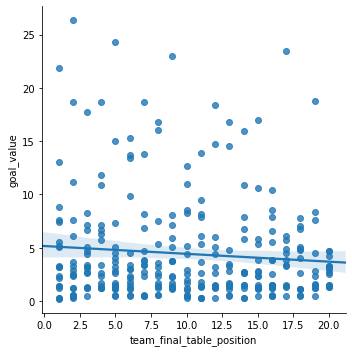

In [149]:
sns.lmplot(x='team_final_table_position', y='goal_value', data=player_goals_outcomes)

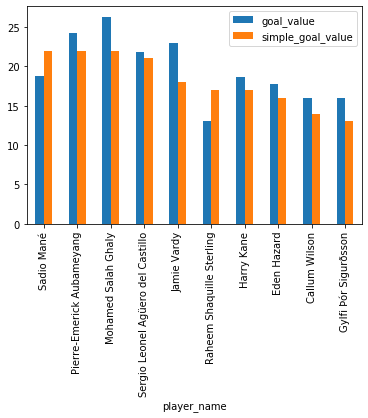

In [150]:
player_goals_outcomes_top10 = sorted_by_simple.head(10);
ax = plt.gca()
player_goals_outcomes_top10.plot(kind='bar',x='player_name',y=['goal_value', 'simple_goal_value'] ,ax=ax)

In [151]:
player_goals_outcomes['gain'] = player_goals_outcomes['goal_value']-player_goals_outcomes['simple_goal_value']
player_goals_outcomes['gain_per_goal'] = player_goals_outcomes['gain']/player_goals_outcomes['simple_goal_value']
sorted_by_gain = player_goals_outcomes.sort_values(by=['gain'], ascending=False)
sorted_by_gain_per_goal = player_goals_outcomes.sort_values(by=['gain_per_goal'], ascending=False)
sorted_by_gain.head(20)

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value,gain,gain_per_goal
190,4433,Glenn Murray,Brighton & Hove Albion FC,17,23.500000,13,10.500000,0.807692
193,4474,Aleksandar Mitrović,Fulham FC,19,18.800000,11,7.800000,0.709091
91,3947,Andre Gray,Watford FC,11,13.900000,7,6.900000,0.985714
30,2799,Luka Milivojević,Crystal Palace FC,12,18.400000,12,6.400000,0.533333
77,3351,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers FC,7,18.633333,13,5.633333,0.433333
138,4140,Marcus Rashford,Manchester United FC,6,15.266667,10,5.266667,0.526667
66,3221,Jamie Vardy,Leicester City FC,9,23.033333,18,5.033333,0.279630
180,4305,Ashley Barnes,Burnley FC,15,16.983333,12,4.983333,0.415278
194,4476,Ayoze Pérez Gutiérrez,Newcastle United FC,13,16.833333,12,4.833333,0.402778
68,3238,Diogo José Teixeira da Silva,Wolverhampton Wanderers FC,7,13.833333,9,4.833333,0.537037


In [152]:
gain_top10 = sorted_by_gain.head(10)
gain_top10

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value,gain,gain_per_goal
190,4433,Glenn Murray,Brighton & Hove Albion FC,17,23.500000,13,10.500000,0.807692
193,4474,Aleksandar Mitrović,Fulham FC,19,18.800000,11,7.800000,0.709091
91,3947,Andre Gray,Watford FC,11,13.900000,7,6.900000,0.985714
30,2799,Luka Milivojević,Crystal Palace FC,12,18.400000,12,6.400000,0.533333
77,3351,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers FC,7,18.633333,13,5.633333,0.433333
138,4140,Marcus Rashford,Manchester United FC,6,15.266667,10,5.266667,0.526667
66,3221,Jamie Vardy,Leicester City FC,9,23.033333,18,5.033333,0.279630
180,4305,Ashley Barnes,Burnley FC,15,16.983333,12,4.983333,0.415278
194,4476,Ayoze Pérez Gutiérrez,Newcastle United FC,13,16.833333,12,4.833333,0.402778
68,3238,Diogo José Teixeira da Silva,Wolverhampton Wanderers FC,7,13.833333,9,4.833333,0.537037


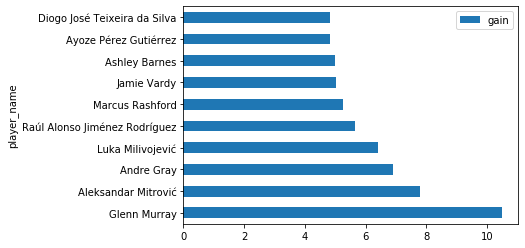

In [153]:
ax = plt.gca()
gain_top10.plot(kind='barh', x='player_name', y='gain' ,ax=ax)

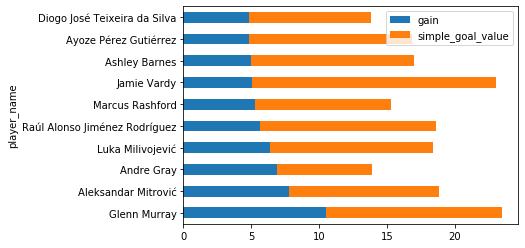

In [154]:
gain_top10 = sorted_by_gain.head(10)
ax = plt.gca()
gain_top10.plot(kind='barh',x='player_name',y=['gain', 'simple_goal_value' ] ,ax=ax, stacked=True)

In [155]:
sorted_by_gain_per_goal.head(10)

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value,gain,gain_per_goal
220,7271,Beram Kayal,Brighton & Hove Albion FC,17,3.4,1,2.4,2.40
171,4251,Adama Traoré Diarra,Wolverhampton Wanderers FC,7,3.4,1,2.4,2.40
260,29147,Juan Marcos Foyth,Tottenham Hotspur FC,4,3.4,1,2.4,2.40
81,3386,Philip Foden,Manchester City FC,1,3.2,1,2.2,2.20
80,3362,Vincent Kompany,Manchester City FC,1,3.2,1,2.2,2.20
102,4010,Phil Jagielka,Everton FC,8,3.2,1,2.2,2.20
176,4280,Timothy Fosu-Mensah,Huddersfield Town FC,20,3.2,1,2.2,2.20
244,14493,Jürgen Locadia,Brighton & Hove Albion FC,17,5.7,2,3.7,1.85
274,461919,João Filipe Iria Santos Moutinho,Wolverhampton Wanderers FC,7,2.7,1,1.7,1.70
222,7287,Christopher Schindler,Huddersfield Town FC,20,2.7,1,1.7,1.70


In [156]:
gain_per_goal_top10 = sorted_by_gain_per_goal.query('simple_goal_value>10').head(10)
gain_per_goal_top10

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value,gain,gain_per_goal
190,4433,Glenn Murray,Brighton & Hove Albion FC,17,23.500000,13,10.500000,0.807692
193,4474,Aleksandar Mitrović,Fulham FC,19,18.800000,11,7.800000,0.709091
30,2799,Luka Milivojević,Crystal Palace FC,12,18.400000,12,6.400000,0.533333
77,3351,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers FC,7,18.633333,13,5.633333,0.433333
180,4305,Ashley Barnes,Burnley FC,15,16.983333,12,4.983333,0.415278
194,4476,Ayoze Pérez Gutiérrez,Newcastle United FC,13,16.833333,12,4.833333,0.402778
280,463459,José Salomón Rondón Giménez,Newcastle United FC,13,14.500000,11,3.500000,0.318182
257,24367,Richarlison de Andrade,Everton FC,8,16.800000,13,3.800000,0.292308
66,3221,Jamie Vardy,Leicester City FC,9,23.033333,18,5.033333,0.279630
279,463422,Gylfi Þór Sigurðsson,Everton FC,8,16.033333,13,3.033333,0.233333


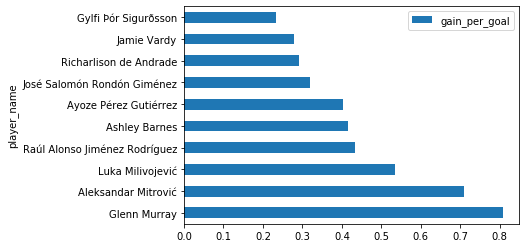

In [157]:
ax = plt.gca()
gain_per_goal_top10.plot(kind='barh',x='player_name',y='gain_per_goal' ,ax=ax, stacked=True)

In [75]:
sorted_by_gain_per_goal.query('simple_goal_value>10').head(20)

,player_id,player_name,team_name,team_final_table_position,goal_value,simple_goal_value,gain,gain_per_goal
292,77721,Valentín Mariano José Castellanos Giménez,New York City FC,1,18.900000,11,7.900000,0.718182
143,4622,Luís Carlos Almeida da Cunha,Orlando City SC,11,19.100000,12,7.100000,0.591667
136,4127,Wayne Rooney,DC United,5,17.233333,11,6.233333,0.566667
238,29111,Brian Leonel Fernández,Portland Timbers,6,16.633333,11,5.633333,0.512121
207,21624,Kacper Przybyłko,Philadelphia Union,3,22.550000,15,7.550000,0.503333
79,299,Jordan Morris,Seattle Sounders FC,2,19.100000,13,6.100000,0.469231
147,4824,Alejandro Pozuelo Melero,Toronto FC,4,20.333333,14,6.333333,0.452381
150,5118,Pedro Miguel Martins Santos,Columbus Crew,10,15.800000,11,4.800000,0.436364
38,169,Mauro Andrés Manotas Páez,Houston Dynamo,10,18.300000,13,5.300000,0.407692
196,18322,Alexandru Ionuț Mitriță,New York City FC,1,16.833333,12,4.833333,0.402778


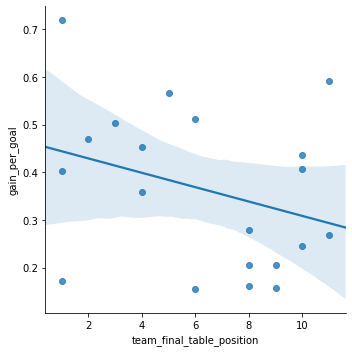

In [76]:
limited = sorted_by_gain_per_goal.query('simple_goal_value>10').head(20)
sns.lmplot(x='team_final_table_position', y='gain_per_goal', data=limited)